In [1]:
import os
# import io
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import (
    SystemMessage,
    UserMessage,
    TextContentItem,
    ImageContentItem,
    ImageUrl,
    ImageDetailLevel,
)
from azure.core.credentials import AzureKeyCredential


In [2]:
token = 'Your GitHub Models Token'
endpoint = "https://models.inference.ai.azure.com"
model_name = "Phi-3.5-vision-instruct"

In [3]:
client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

In [4]:
response = client.complete(
    messages=[
        SystemMessage(
            content="You are my Python programming assistant，helping me generate Python code based on understanding the images of different charts"
        ),
        UserMessage(
            content=[
                TextContentItem(text="""
                                Please generate code according to the chart in the picture according to the following requirements
                                        1. Keep all information in the chart, including data and text
                                        2. Do not generate additional information that is not included in the chart
                                        3. Please extract data from the picture, do not generate it from csv
                                        4. Please save the regenerated chart as a chart and save it to ./output/demo.png
                                """),
                ImageContentItem(
                    image_url=ImageUrl.load(
                        image_file="./charts/demo1.png",
                        image_format="png",
                        detail=ImageDetailLevel.HIGH)
                ),
            ],
        ),
    ],
    model=model_name,
    temperature=0.1,
    max_tokens=2048
)

In [5]:
result = response.choices[0].message.content

In [6]:
result

' ```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Data in CSV format\ncsv_data = """\nDay,Tips by Gender\nThursday,100|50\nFriday,50|25\nSaturday,200|100\nSunday,250|50\n"""\n\n# Convert the CSV data into a DataFrame\ndata = pd.read_csv(io.StringIO(csv_data), sep=",")\n\n# Splitting the \'Tips by Gender\' column into two separate columns\ndata[[\'Male\', \'Female\']] = data[\'Tips by Gender\'].str.split(\'|\', expand=True)\ndata[\'Male\'] = pd.to_numeric(data[\'Male\'])\ndata[\'Female\'] = pd.to_numeric(data[\'Female\'])\n\n# Plotting the stacked bar chart\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Plotting the data\nax.bar(data[\'Day\'], data[\'Male\'], label=\'Male\', color=\'#66c2a5\')\nax.bar(data[\'Day\'], data[\'Female\'], bottom=data[\'Male\'], label=\'Female\', color=\'#fc8d62\')\n\n# Adding titles and labels\nax.set_title(\'Tips by Day and Gender\')\nax.set_xlabel(\'Day\')\nax.set_ylabel(\'Tips\')\nax.legend()\n\n# Save the figure\nplt.savefig(\'./outpu

In [7]:
begin = result.index("```python")
gen = result[begin+9:]
code = gen[0:gen.index("```")]

In [8]:
code

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Data in CSV format\ncsv_data = """\nDay,Tips by Gender\nThursday,100|50\nFriday,50|25\nSaturday,200|100\nSunday,250|50\n"""\n\n# Convert the CSV data into a DataFrame\ndata = pd.read_csv(io.StringIO(csv_data), sep=",")\n\n# Splitting the \'Tips by Gender\' column into two separate columns\ndata[[\'Male\', \'Female\']] = data[\'Tips by Gender\'].str.split(\'|\', expand=True)\ndata[\'Male\'] = pd.to_numeric(data[\'Male\'])\ndata[\'Female\'] = pd.to_numeric(data[\'Female\'])\n\n# Plotting the stacked bar chart\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Plotting the data\nax.bar(data[\'Day\'], data[\'Male\'], label=\'Male\', color=\'#66c2a5\')\nax.bar(data[\'Day\'], data[\'Female\'], bottom=data[\'Male\'], label=\'Female\', color=\'#fc8d62\')\n\n# Adding titles and labels\nax.set_title(\'Tips by Day and Gender\')\nax.set_xlabel(\'Day\')\nax.set_ylabel(\'Tips\')\nax.legend()\n\n# Save the figure\nplt.savefig(\'./output/demo.png

In [9]:
import io

In [10]:
exec(code)

In [11]:
from PIL import Image

In [12]:
img = Image.open('./charts/demo1.png')

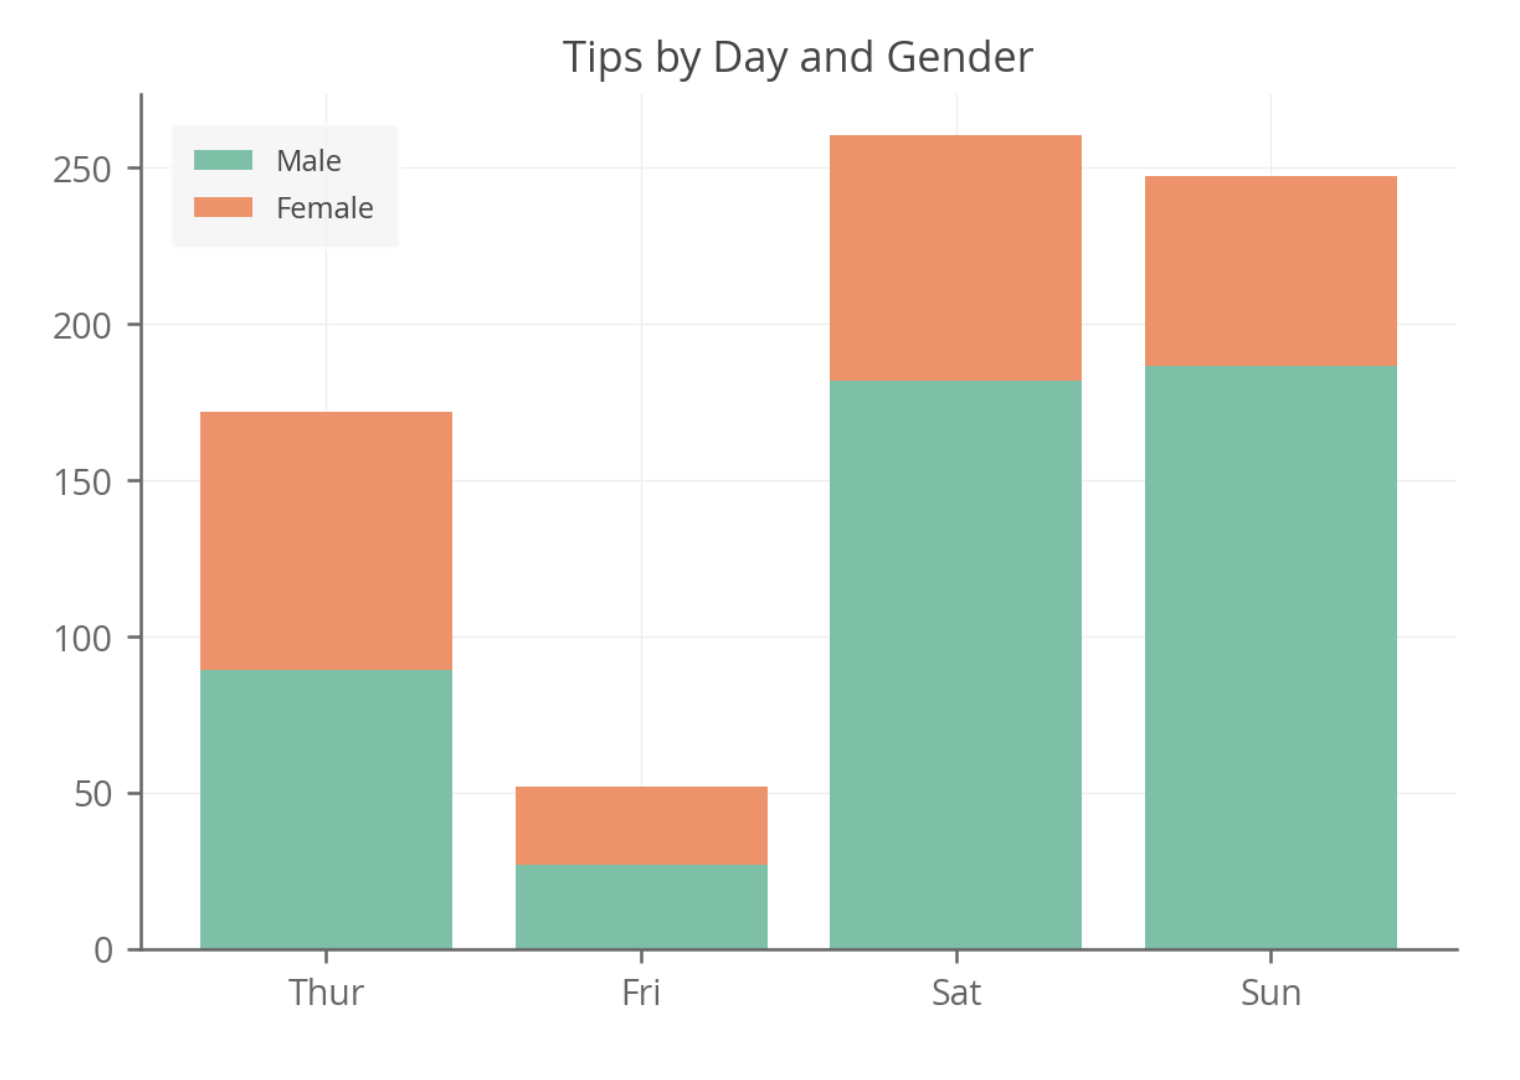

In [13]:
img

In [14]:
genimg = Image.open('./output/demo.png')

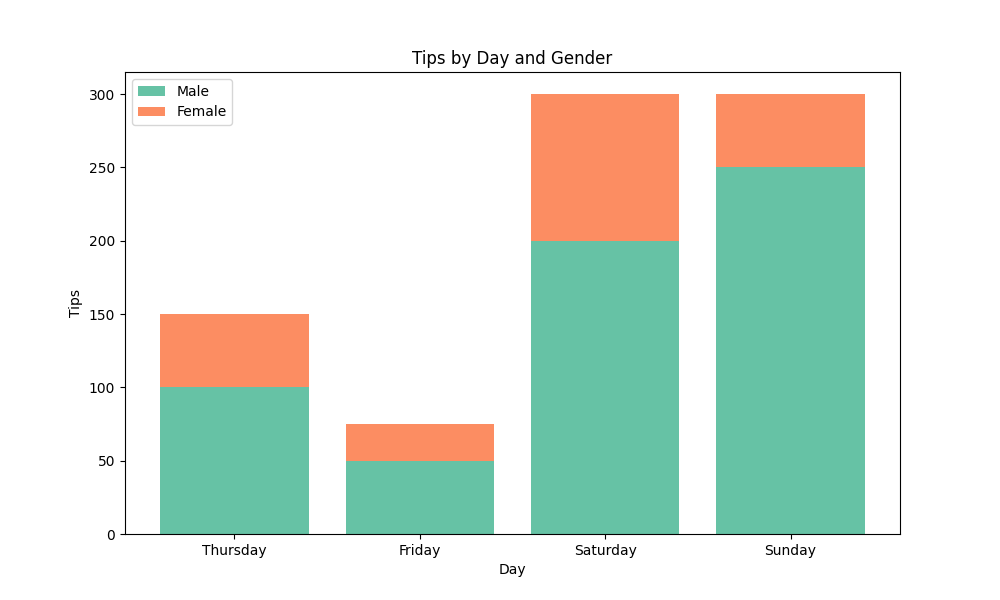

In [15]:
genimg